### **IMPORT LIBRARIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils



### **LOADING THE DATA**

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## **ANALYSING THE DATA**

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

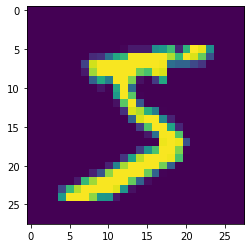

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

## **Reshaping the data**

In [ ]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test =X_test.reshape(10000,28,28,1).astype('float32')



## **One Hot Encoding**

In [ ]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# **MODEL BUILDING**

# *ADD CNN LAYERS*

In [ ]:
# CREATING THE MODEL
model = Sequential()
#adding model layer
number_of_classes = 10
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

## **Compiling the model**


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

### **Train the model**

*Fitting the model *

In [ ]:
model.fit(X_train,y_train,epochs= 7,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/7
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2404 - accuracy: 0.9492 - val_loss: 0.0842 - val_accuracy: 0.9746
Epoch 2/7
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0714 - accuracy: 0.9788 - val_loss: 0.1140 - val_accuracy: 0.9695
Epoch 3/7
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0485 - accuracy: 0.9844 - val_loss: 0.0970 - val_accuracy: 0.9752
Epoch 4/7
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0994 - val_accuracy: 0.9762
Epoch 5/7
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.1214 - val_accuracy: 0.9764
Epoch 6/7
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.1247 - val_accuracy: 0.9752
Epoch 7/7
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.1463 -

# OBSERVING THE METRICS

In [ ]:
metrics= model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.146253764629364, 0.9764000177383423]


## PREDICTING THE OUTPUT

In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 58ms/step
[[5.53775004e-18 9.27022401e-28 2.63474296e-20 1.71154982e-15
  6.57022803e-24 7.35291148e-26 5.15451978e-29 1.00000000e+00
  2.09986416e-19 2.03979362e-15]
 [3.83594385e-19 2.80365619e-14 1.00000000e+00 4.85453995e-22
  1.82668985e-21 1.75743379e-29 2.10802990e-12 1.73347530e-24
  1.95733432e-18 2.64377643e-33]
 [3.78187752e-20 1.00000000e+00 4.60313992e-12 1.06514219e-19
  3.73019948e-11 4.92859487e-09 1.01441614e-14 8.38322060e-15
  8.15441159e-10 7.23129894e-18]
 [1.00000000e+00 3.41527227e-28 1.05760735e-19 1.02006321e-27
  2.34160937e-21 3.54824843e-20 8.56108277e-18 3.60111922e-18
  3.36594500e-19 1.40978284e-18]]


In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


1/1 [==============================] - 0s 12ms/step
Prediction (Softmax) from the neural network:

 [[1.0000000e+00 3.1350447e-29 3.4941973e-20 9.9604485e-30 1.4489364e-24
  3.4787094e-24 2.7601195e-15 2.7478037e-25 2.2327945e-21 3.5548227e-18]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




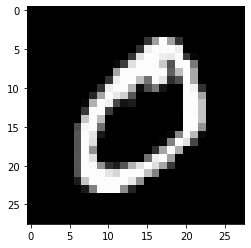



Final Output: 0


In [ ]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

# OBSERVING THE METRICS

In [ ]:
metrics= model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.146253764629364, 0.9764000177383423]


# TEST THE MODEL

In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 14ms/step
[[5.53775004e-18 9.27022401e-28 2.63474296e-20 1.71154982e-15
  6.57022803e-24 7.35291148e-26 5.15451978e-29 1.00000000e+00
  2.09986416e-19 2.03979362e-15]
 [3.83594385e-19 2.80365619e-14 1.00000000e+00 4.85453995e-22
  1.82668985e-21 1.75743379e-29 2.10802990e-12 1.73347530e-24
  1.95733432e-18 2.64377643e-33]
 [3.78187752e-20 1.00000000e+00 4.60313992e-12 1.06514219e-19
  3.73019948e-11 4.92859487e-09 1.01441614e-14 8.38322060e-15
  8.15441159e-10 7.23129894e-18]
 [1.00000000e+00 3.41527227e-28 1.05760735e-19 1.02006321e-27
  2.34160937e-21 3.54824843e-20 8.56108277e-18 3.60111922e-18
  3.36594500e-19 1.40978284e-18]]


In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# SAVE THE MODEL

In [ ]:
model.save('model.h5')

### TEST WITH SAVED MODEL

In [ ]:
image = cv2.imread('test_image.jpg')
image = np.full((100,80,3), 12, dtype = np.uint8)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
import os, types
import pandas as pd

def __iter__(self): return 0

print=("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

NameError: ignored